## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
imoveis = pd.read_csv('housing.csv')

imoveis.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
imoveis.info()
imoveis.ocean_proximity.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
imoveis_dados = pd.get_dummies(imoveis, drop_first = True)

imoveis_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

In [5]:
x = imoveis_dados.drop(columns = ['median_house_value']).copy()

x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [7]:
y =  imoveis_dados.loc[:,'median_house_value']

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=7)

In [9]:
regr_1 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
path = regr_1.cost_complexity_pruning_path(x_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 8.17316185e+08, 1.69696629e+09, 3.92050655e+09]),
 'impurities': array([6.86004084e+09, 7.67735703e+09, 9.37432332e+09, 1.32948299e+10])}

Text(0, 0.5, 'Impureza total das folhas')

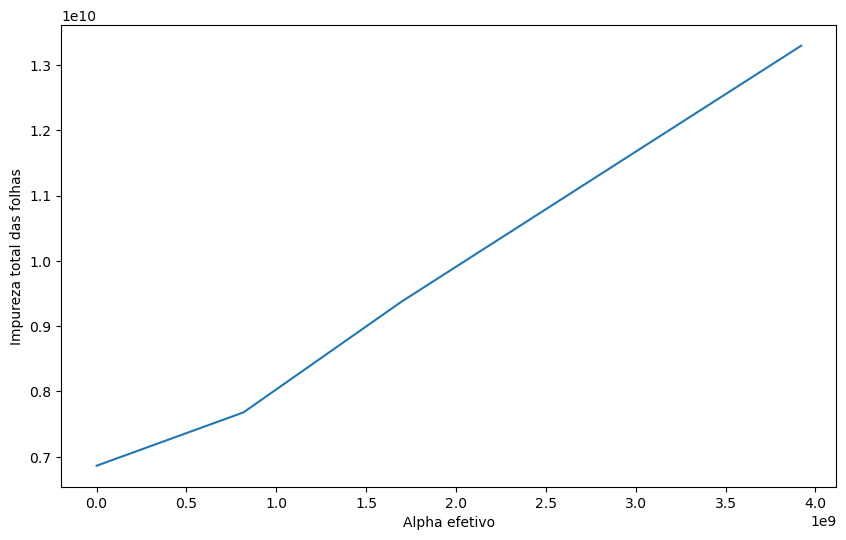

In [14]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=817316185.4379797, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1696966287.4710166, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3920506551.752573, random_state=0)]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [19]:

for i in clfs:
    msei = i.score(x_train, y_train)
    print(msei)

0.6731199756136043
0.6698428299504909
0.6698428299504909
0.6698428299504909


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

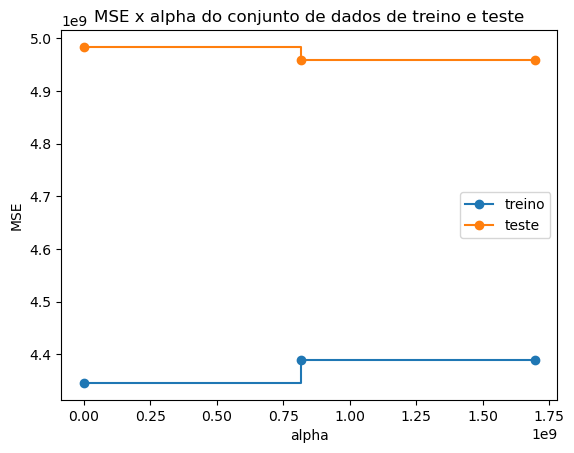

In [22]:
train_scores = [mean_squared_error(y_train , clf.predict(x_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(x_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
regr_2 = DecisionTreeRegressor(ccp_alpha=3920506551.752573, random_state=0)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=3920506551.752573, random_state=0)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [39]:
r2_train = regr_2.score(x_train, y_train)
r2_test = regr_2.score(x_test, y_test)

print(f"R² no treino: {r2_train:.4f}")
print(f"R² no teste: {r2_test:.4f}")

R² no treino: 0.6698
R² no teste: 0.6288


### 7. Visualize esta árvore.

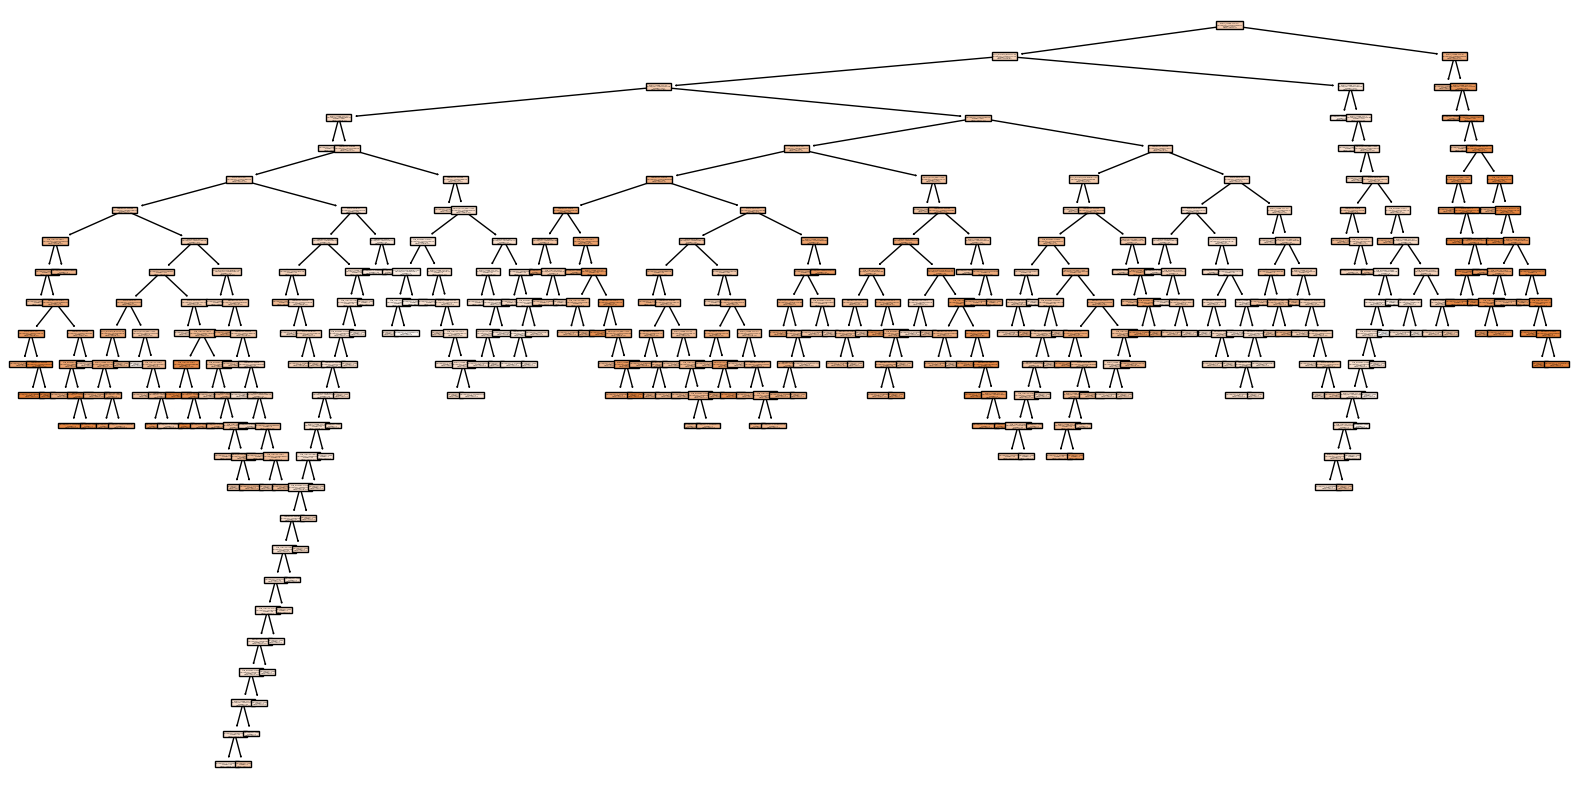

In [38]:
plt.figure(figsize=(20, 10))
plot_tree(regr_2, feature_names=x.columns.tolist(), filled=True)
plt.show()